Here, we solve a simplified version of the Goldreich-Schubert Dispersion relation in order to find fastest growing modes for parameters we can use in our simulations.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np

In [2]:
sy.init_printing()

In [3]:
sigma, kt, kz, chi0, Omega, Pr, N, kappa = sy.symbols(['sigma','k_t','k_z','chi_0','Omega','Pr', 'N', 'kappa'])

This assumes a simplified version of GS that excludes $z$ dependence on $\Omega$ or the background thermal stratification. It limits to the Korykansky (1991) dispersion relation, if you correct for his typos.

In [4]:
disp = sigma**3 + sigma**2*kt**2*chi0/Omega * (1 + 2*Pr) + sigma*((kz/kt)**2*(N**2 + kappa**2)/Omega**2 + (2 + Pr)*Pr*chi0**2*kt**4/Omega**2) + kz**2 * chi0/Omega**3*(Pr*N**2 + kappa**2) + chi0**3 * Pr**2 * kt**6/Omega**3

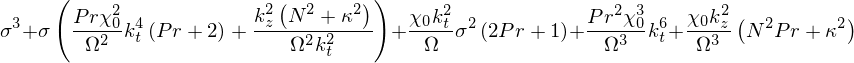

In [5]:
disp

`sy.solve` assumes the first argument is equal to zero; the second argument is the variable to solve for.

In [6]:
%%time
disp_solved = sy.solve(disp,sigma)

CPU times: user 1min 13s, sys: 132 ms, total: 1min 14s
Wall time: 1min 14s


In [7]:
branch_1 = disp_solved[0]
branch_2 = disp_solved[1]
branch_3 = disp_solved[2]

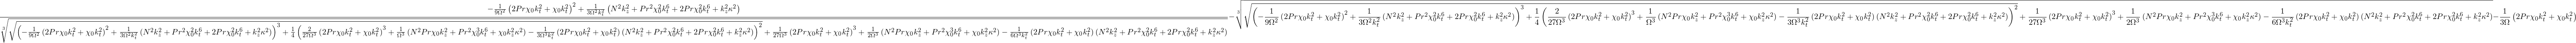

In [8]:
branch_1

In [9]:
b1 = sy.lambdify([Pr, chi0, kt,kz,N,kappa,Omega],branch_1,"numpy")
b2 = sy.lambdify([Pr, chi0, kt,kz,N,kappa,Omega],branch_2,"numpy")
b3 = sy.lambdify([Pr, chi0, kt,kz,N,kappa,Omega],branch_3,"numpy")


In [10]:
kz = np.linspace(0.1,100,10000)

In [52]:
#chi_v = 1e-3
#Pr_v = 0.3
#N_v = 2.
#kappa_v = np.sqrt(2)*1j
#Omega_v = 1.
chi_v = 1e-3
Pr_v = 0.3
N_v = 3.
kappa_v = np.sqrt(7.3)*1j
Omega_v = 1.


bb1 =b1(Pr_v,chi_v,kz,kz,N_v,kappa_v,Omega_v)
bb2 =b2(Pr_v,chi_v,kz,kz,N_v,kappa_v,Omega_v)
bb3 =b3(Pr_v,chi_v,kz,kz,N_v,kappa_v,Omega_v)

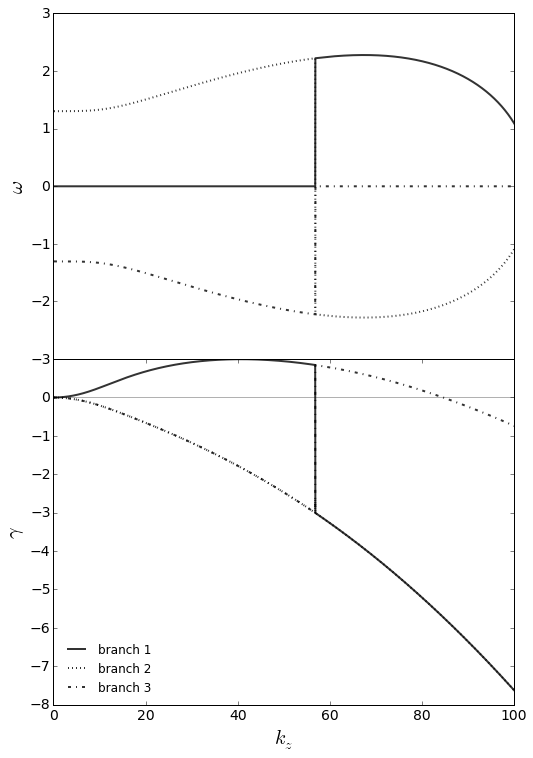

In [53]:
fig = plt.figure(figsize=(8,12))
real_ax = fig.add_axes([0.1,0.1,0.8,0.4])
imag_ax = fig.add_axes([0.1,0.5,0.8,0.4])
real_ax.plot(kz,bb1.real,alpha=0.8,color='k',linestyle="-",linewidth=2, label='branch 1')
real_ax.plot(kz,bb2.real,alpha=0.8,color='k',linestyle=":",linewidth=2, label='branch 2')
real_ax.plot(kz,bb3.real,alpha=0.8,color='k',linestyle='-.',linewidth=2, label='branch 3')
real_ax.legend(loc='lower left').draw_frame(False)

real_ax.axhline(0,color='k',alpha=0.3)
real_ax.set_xlabel(r'$k_z$',size=20)
real_ax.set_ylabel(r'$\gamma$',size=20)
t = real_ax.yaxis.get_major_ticks()
t[-1].set_visible(False)

imag_ax.plot(kz,bb1.imag,alpha=0.8,color='k',linestyle="-",linewidth=2)
imag_ax.plot(kz,bb2.imag,alpha=0.8,color='k',linestyle=":",linewidth=2)
imag_ax.plot(kz,bb3.imag,alpha=0.8,color='k',linestyle='-.',linewidth=2)

imag_ax.set_ylabel(r'$\omega$',size=20)
imag_ax.xaxis.set_visible(False)

for ax in [real_ax,imag_ax]:
    ax.tick_params(labelsize=14)